In [228]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [27]:
df = pd.read_excel("/home/hunaid/fe/multiReg.xls").replace("--", np.nan)

df

,Symbol,Average Returns,Price to Book,Price to Earning,Price to Sales,Price to Cash Flow,Firm Size,Momentum,Dividend Yield,Debt to Equity,RoA,RoE,GPM,NPM,Current Ratio,Market Cap
0,ATOR,-0.005081,0.64,6.01,0.31,5.46,1,0.955361,1.63,40.63,4.01,13.75,4.27,3.65,1.23,18.99
1,LUKC,0.006608,1.79,11.75,1.84,10.35,3,1.038015,3.54,19.29,10.57,16.10,26.24,16.58,2.12,177.38
2,SEAR,-0.005798,5.91,21.02,4.07,17.53,2,0.998853,2.44,1.07,19.47,30.86,53.11,19.25,1.74,60.15
3,EPCL,0.000309,3.04,9.88,1.08,8.89,2,0.995140,3.16,101.31,10.24,34.28,22.39,8.97,1.15,31.69
4,PKEL,0.001187,0.75,7.34,0.70,5.57,1,0.979187,6.79,13.68,6.21,10.24,28.87,9.62,2.11,20.41
5,MARI,0.005628,1.08,12.81,2.28,10.84,1,1.002766,14.11,0.00,5.83,8.34,NaN,17.79,1.95,1.66
6,ATOC,0.009424,1.36,6.42,1.09,5.52,1,1.060469,9.18,30.33,11.74,22.30,33.89,16.82,0.73,18.59
7,MILM,0.003311,9.46,9.44,1.33,8.39,2,1.005214,10.12,0.00,28.72,101.96,26.88,15.37,1.28,53.66
8,DAWH,0.004582,1.07,2.20,0.40,0.69,2,0.998013,12.73,114.33,26.08,58.30,23.17,51.30,1.93,60.05
9,KAPCO,-0.001408,2.06,7.07,0.82,5.69,2,1.007268,11.92,0.20,9.07,29.77,17.33,11.54,1.29,52.75


In [188]:
model = smf.OLS(df['Average Returns'], sm.tools.add_constant(df['Momentum']), missing='drop').fit()

In [322]:
def makeModel (dependants, df=df):
    display(Markdown("<br /> <h3>" + str(dependants) + "</h3>"))
    
    model = smf.OLS(df['Average Returns'], sm.tools.add_constant(df[dependants]), missing='drop').fit()
    print(model.summary())
    
    if model.rsquared_adj > .7:
        display(Markdown("<br /> <h4 style='color:green'>R squared is above the threshold of 0.7. Most of the variation in the dependant variable is explained by the independant variables.</h4>"))
    else:
        display(Markdown("<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>"))
    
    x = model.f_pvalue
    if x < .5:
        c = 'green'
    else:
        c = 'red'
    display(Markdown("<br /> <h4 style='color:"+c+"'>There is a " + str(x * 100)[:4] + "% chance that the independant variables are 0 in the population.</h4>"))
    
    x = sms.het_white(model.resid, model.model.exog)[3]
    if x < .5:
        c = 'green'
    else:
        c = 'red'
    display(Markdown("<br /> <h4 style='color:"+c+"'>There is a " + str(x * 100)[:4] + "% chance that the data is not homoskedatistic.</h4>"))
    
    #display(Markdown("<br /> <h4>There is a " + str(sms.linear_lm(model.resid, model.model.exog)[1] * 100)[:4] + "% chance that the error term is correlated with the exogenous variables.</h4>"))
    
    if sum(model.params < 2) == 0:
        display(Markdown("<br /> <h4 style='color:green'>T-stats of all independant variables are above 2</h4>"))
    else:
        display(Markdown("<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>"))
    
    dw = sms.durbin_watson(model.resid)
    if dw < 3 or dw > 1:
        display(Markdown("<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>"))
    else:
        display(Markdown("<br /> <h4 style='color:red'>Durbin Watson stat is beyond the 1 to 3 range. There is strong evidence of serial correlation.</h4>"))
    
    plt.plot(model.fittedvalues)
    plt.plot(model.resid)
    plt.title("Plot of Fitted values and Residuals")
    plt.legend()
    plt.show()
    
    display(Markdown("<h4>Multicollinearity Condition Number:&nbsp;" + str(model.condition_number)[:5] + " </h4>"))

In [183]:
from itertools import combinations

<hr style='height:3px'/> <br /> <h2>1</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3.410
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0553
Time:                        16:47:45   Log-Likelihood:                 97.798
No. Observations:                  21   AIC:                            -167.6
Df Residuals:                       7   BIC:                            -153.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1764      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 5.52% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

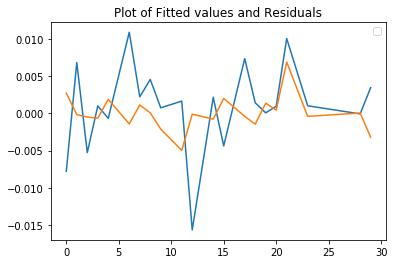

<h4>Multicollinearity Condition Number:&nbsp;10340 </h4>

<hr style='height:3px'/> <br /> <h2>2</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     3.384
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0564
Time:                        16:47:46   Log-Likelihood:                 97.726
No. Observations:                  21   AIC:                            -167.5
Df Residuals:                       7   BIC:                            -152.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1716      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 5.63% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

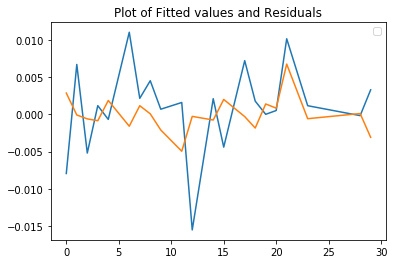

<h4>Multicollinearity Condition Number:&nbsp;17141 </h4>

<hr style='height:3px'/> <br /> <h2>3</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3.076
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0710
Time:                        16:47:46   Log-Likelihood:                 96.869
No. Observations:                  21   AIC:                            -165.7
Df Residuals:                       7   BIC:                            -151.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1538      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 7.10% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

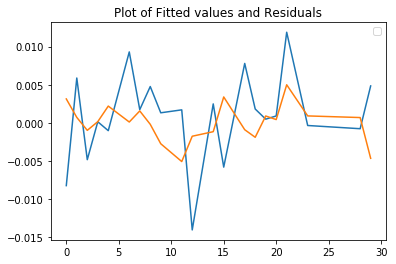

<h4>Multicollinearity Condition Number:&nbsp;15582 </h4>

<hr style='height:3px'/> <br /> <h2>4</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3.524
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0403
Time:                        16:47:46   Log-Likelihood:                 101.74
No. Observations:                  22   AIC:                            -175.5
Df Residuals:                       8   BIC:                            -160.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2053      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 4.03% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

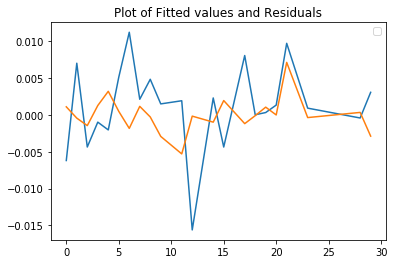

<h4>Multicollinearity Condition Number:&nbsp;12747 </h4>

<hr style='height:3px'/> <br /> <h2>5</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3.426
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0547
Time:                        16:47:47   Log-Likelihood:                 97.839
No. Observations:                  21   AIC:                            -167.7
Df Residuals:                       7   BIC:                            -153.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1747      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 5.46% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

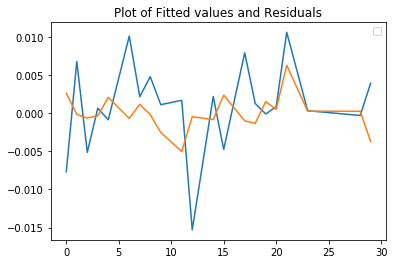

<h4>Multicollinearity Condition Number:&nbsp;16728 </h4>

<hr style='height:3px'/> <br /> <h2>6</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     3.024
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0740
Time:                        16:47:47   Log-Likelihood:                 96.718
No. Observations:                  21   AIC:                            -165.4
Df Residuals:                       7   BIC:                            -150.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1437      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 7.39% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

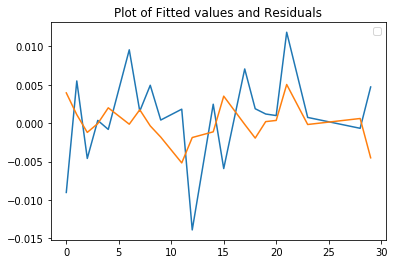

<h4>Multicollinearity Condition Number:&nbsp;14121 </h4>

<hr style='height:3px'/> <br /> <h2>7</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     3.406
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0554
Time:                        16:47:47   Log-Likelihood:                 97.787
No. Observations:                  21   AIC:                            -167.6
Df Residuals:                       7   BIC:                            -152.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1619      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 5.54% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

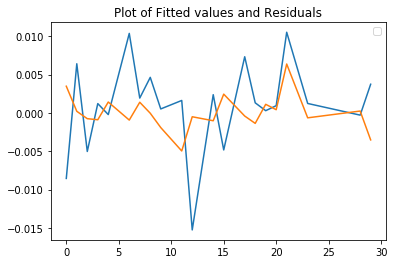

<h4>Multicollinearity Condition Number:&nbsp;13510 </h4>

<hr style='height:3px'/> <br /> <h2>8</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     3.276
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0404
Time:                        16:47:47   Log-Likelihood:                 104.98
No. Observations:                  23   AIC:                            -182.0
Df Residuals:                       9   BIC:                            -166.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1856      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 4.04% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

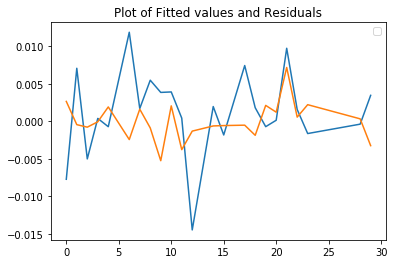

<h4>Multicollinearity Condition Number:&nbsp;12705 </h4>

<hr style='height:3px'/> <br /> <h2>9</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1.230
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.408
Time:                        16:47:48   Log-Likelihood:                 89.363
No. Observations:                  21   AIC:                            -150.7
Df Residuals:                       7   BIC:                            -136.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0122      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 40.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

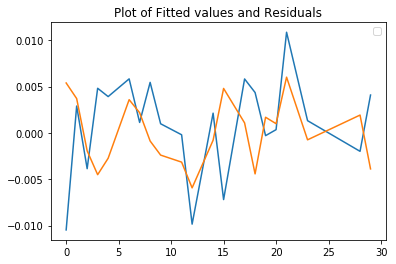

<h4>Multicollinearity Condition Number:&nbsp;3093. </h4>

<hr style='height:3px'/> <br /> <h2>10</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3.444
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0540
Time:                        16:47:48   Log-Likelihood:                 97.886
No. Observations:                  21   AIC:                            -167.8
Df Residuals:                       7   BIC:                            -153.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1760      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 5.39% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

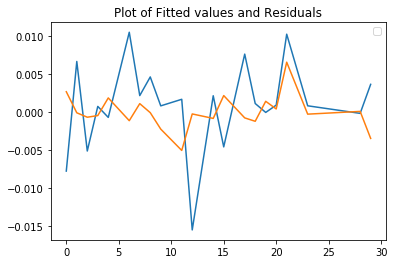

<h4>Multicollinearity Condition Number:&nbsp;12953 </h4>

<hr style='height:3px'/> <br /> <h2>11</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     2.839
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0858
Time:                        16:47:48   Log-Likelihood:                 96.156
No. Observations:                  21   AIC:                            -164.3
Df Residuals:                       7   BIC:                            -149.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1606      0.058  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 8.57% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

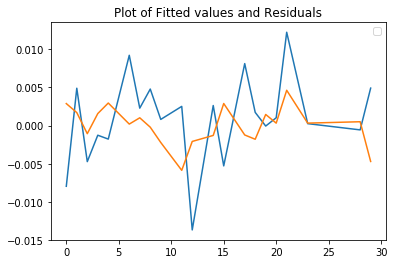

<h4>Multicollinearity Condition Number:&nbsp;16856 </h4>

<hr style='height:3px'/> <br /> <h2>12</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     3.104
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0695
Time:                        16:47:49   Log-Likelihood:                 96.948
No. Observations:                  21   AIC:                            -165.9
Df Residuals:                       7   BIC:                            -151.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1675      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 6.95% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

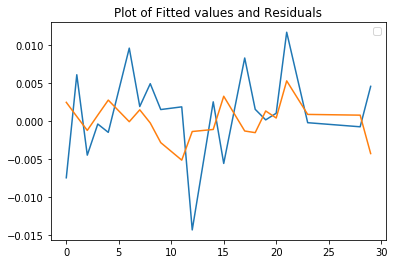

<h4>Multicollinearity Condition Number:&nbsp;17030 </h4>

<hr style='height:3px'/> <br /> <h2>13</h3>

<br /> <h3>[u'Price to Book', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2.701
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0962
Time:                        16:47:49   Log-Likelihood:                 95.717
No. Observations:                  21   AIC:                            -163.4
Df Residuals:                       7   BIC:                            -148.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2050      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 9.61% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

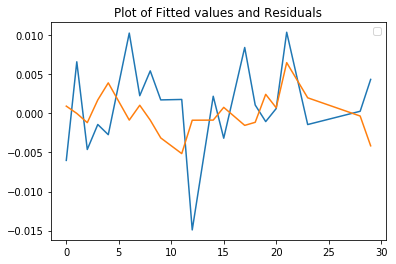

<h4>Multicollinearity Condition Number:&nbsp;15260 </h4>

<hr style='height:3px'/> <br /> <h2>14</h3>

<br /> <h3>[u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE', u'GPM', u'NPM', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3.289
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0605
Time:                        16:47:49   Log-Likelihood:                 97.469
No. Observations:                  21   AIC:                            -166.9
Df Residuals:                       7   BIC:                            -152.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1721      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 6.04% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

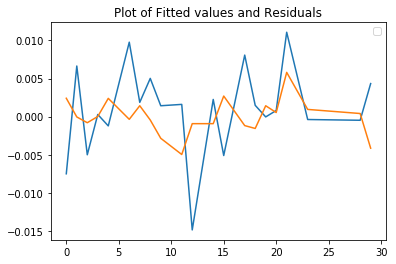

<h4>Multicollinearity Condition Number:&nbsp;17146 </h4>

<hr style='height:3px'/> <br /> <h2>15</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     4.406
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0112
Time:                        16:47:50   Log-Likelihood:                 98.487
No. Observations:                  22   AIC:                            -175.0
Df Residuals:                      11   BIC:                            -163.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1788      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.11% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

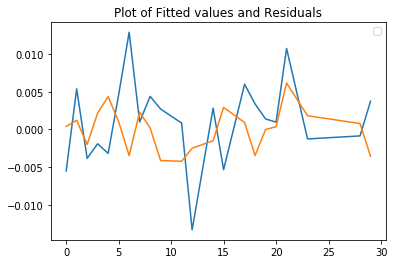

<h4>Multicollinearity Condition Number:&nbsp;7051. </h4>

<hr style='height:3px'/> <br /> <h2>16</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4.197
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0166
Time:                        16:47:50   Log-Likelihood:                 94.182
No. Observations:                  21   AIC:                            -166.4
Df Residuals:                      10   BIC:                            -154.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1529      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.66% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

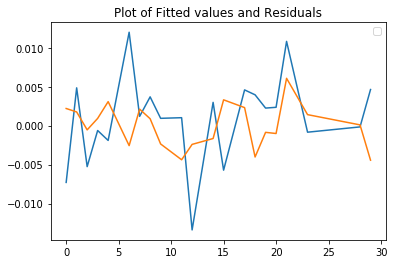

<h4>Multicollinearity Condition Number:&nbsp;7358. </h4>

<hr style='height:3px'/> <br /> <h2>17</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     5.770
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00387
Time:                        16:47:50   Log-Likelihood:                 100.92
No. Observations:                  22   AIC:                            -179.8
Df Residuals:                      11   BIC:                            -167.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1926      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.38% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

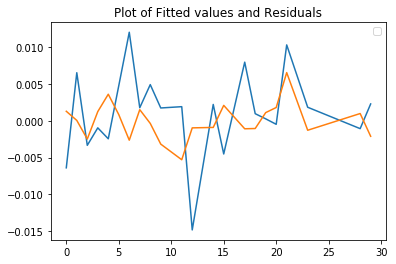

<h4>Multicollinearity Condition Number:&nbsp;7111. </h4>

<hr style='height:3px'/> <br /> <h2>18</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     3.942
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0169
Time:                        16:47:50   Log-Likelihood:                 97.519
No. Observations:                  22   AIC:                            -173.0
Df Residuals:                      11   BIC:                            -161.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1634      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.68% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

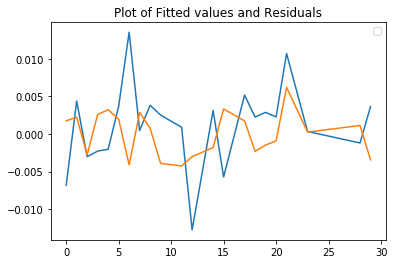

<h4>Multicollinearity Condition Number:&nbsp;6461. </h4>

<hr style='height:3px'/> <br /> <h2>19</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoA', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4.070
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0150
Time:                        16:47:51   Log-Likelihood:                 97.794
No. Observations:                  22   AIC:                            -173.6
Df Residuals:                      11   BIC:                            -161.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1602      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.50% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

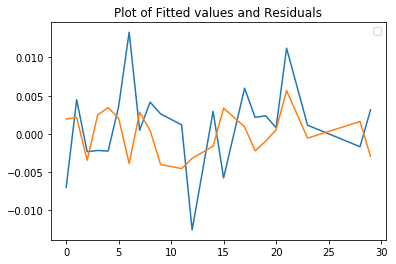

<h4>Multicollinearity Condition Number:&nbsp;9937. </h4>

<hr style='height:3px'/> <br /> <h2>20</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoE', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4.238
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0161
Time:                        16:47:51   Log-Likelihood:                 94.265
No. Observations:                  21   AIC:                            -166.5
Df Residuals:                      10   BIC:                            -155.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1570      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.60% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

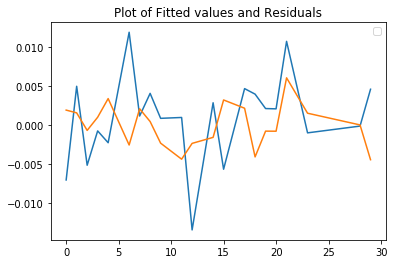

<h4>Multicollinearity Condition Number:&nbsp;8011. </h4>

<hr style='height:3px'/> <br /> <h2>21</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoE', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     4.200
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0134
Time:                        16:47:51   Log-Likelihood:                 98.067
No. Observations:                  22   AIC:                            -174.1
Df Residuals:                      11   BIC:                            -162.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1663      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.33% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

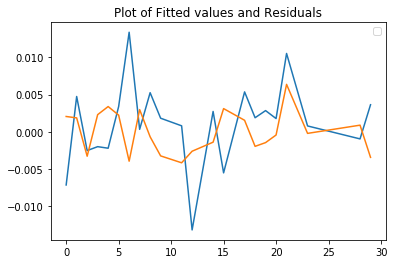

<h4>Multicollinearity Condition Number:&nbsp;6523. </h4>

<hr style='height:3px'/> <br /> <h2>22</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoE', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     4.122
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0143
Time:                        16:47:51   Log-Likelihood:                 97.905
No. Observations:                  22   AIC:                            -173.8
Df Residuals:                      11   BIC:                            -161.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1684      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.43% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

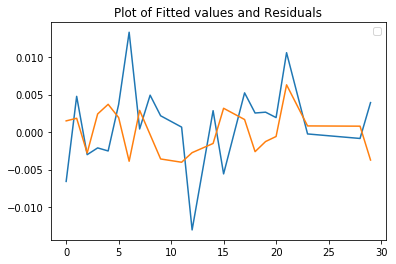

<h4>Multicollinearity Condition Number:&nbsp;6638. </h4>

<hr style='height:3px'/> <br /> <h2>23</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'RoE', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4.244
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0129
Time:                        16:47:52   Log-Likelihood:                 98.159
No. Observations:                  22   AIC:                            -174.3
Df Residuals:                      11   BIC:                            -162.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1651      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.28% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

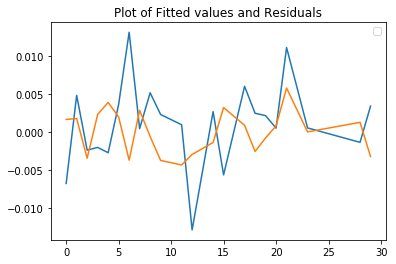

<h4>Multicollinearity Condition Number:&nbsp;10113 </h4>

<hr style='height:3px'/> <br /> <h2>24</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'GPM', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     4.418
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0139
Time:                        16:47:52   Log-Likelihood:                 94.618
No. Observations:                  21   AIC:                            -167.2
Df Residuals:                      10   BIC:                            -155.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1602      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.39% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

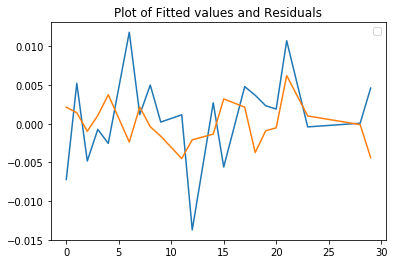

<h4>Multicollinearity Condition Number:&nbsp;7595. </h4>

<hr style='height:3px'/> <br /> <h2>25</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'GPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     4.251
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0159
Time:                        16:47:52   Log-Likelihood:                 94.289
No. Observations:                  21   AIC:                            -166.6
Df Residuals:                      10   BIC:                            -155.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1456      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.59% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

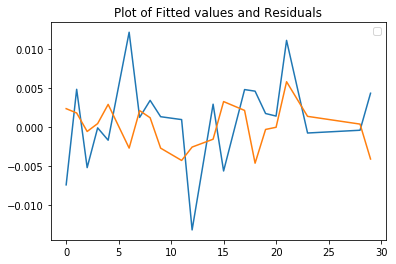

<h4>Multicollinearity Condition Number:&nbsp;7698. </h4>

<hr style='height:3px'/> <br /> <h2>26</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'GPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     4.917
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00951
Time:                        16:47:53   Log-Likelihood:                 95.544
No. Observations:                  21   AIC:                            -169.1
Df Residuals:                      10   BIC:                            -157.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1380      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.95% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

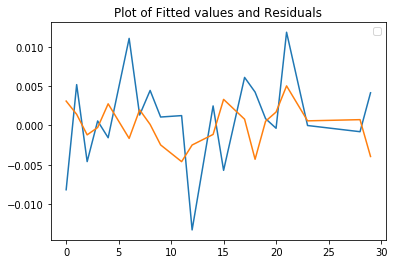

<h4>Multicollinearity Condition Number:&nbsp;11797 </h4>

<hr style='height:3px'/> <br /> <h2>27</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'NPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     4.195
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0134
Time:                        16:47:53   Log-Likelihood:                 98.056
No. Observations:                  22   AIC:                            -174.1
Df Residuals:                      11   BIC:                            -162.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1676      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.34% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

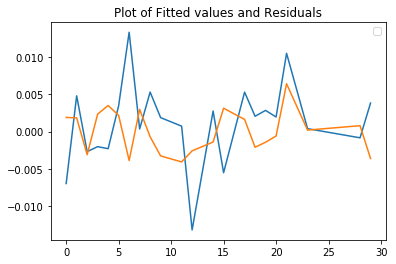

<h4>Multicollinearity Condition Number:&nbsp;6502. </h4>

<hr style='height:3px'/> <br /> <h2>28</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'NPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4.274
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0125
Time:                        16:47:53   Log-Likelihood:                 98.220
No. Observations:                  22   AIC:                            -174.4
Df Residuals:                      11   BIC:                            -162.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1646      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.25% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

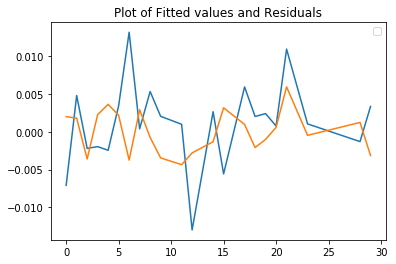

<h4>Multicollinearity Condition Number:&nbsp;10078 </h4>

<hr style='height:3px'/> <br /> <h2>29</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4.546
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00994
Time:                        16:47:53   Log-Likelihood:                 98.763
No. Observations:                  22   AIC:                            -175.5
Df Residuals:                      11   BIC:                            -163.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1672      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.99% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

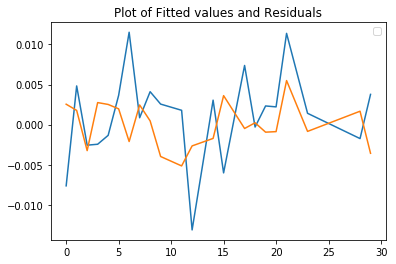

<h4>Multicollinearity Condition Number:&nbsp;10065 </h4>

<hr style='height:3px'/> <br /> <h2>30</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'RoE', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     4.226
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0162
Time:                        16:47:54   Log-Likelihood:                 94.240
No. Observations:                  21   AIC:                            -166.5
Df Residuals:                      10   BIC:                            -155.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1531      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.62% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

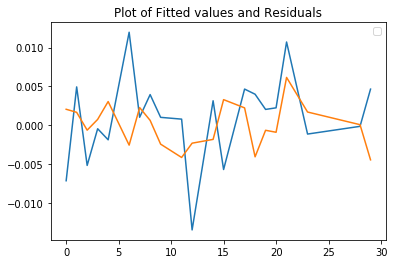

<h4>Multicollinearity Condition Number:&nbsp;2572. </h4>

<hr style='height:3px'/> <br /> <h2>31</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'RoE', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     5.127
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00623
Time:                        16:47:54   Log-Likelihood:                 99.841
No. Observations:                  22   AIC:                            -177.7
Df Residuals:                      11   BIC:                            -165.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1768      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.62% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

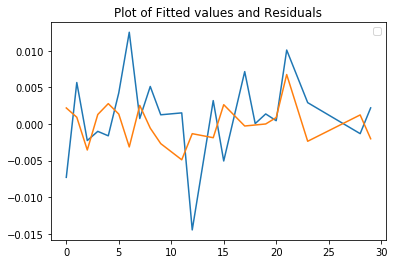

<h4>Multicollinearity Condition Number:&nbsp;2279. </h4>

<hr style='height:3px'/> <br /> <h2>32</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'RoE', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3.989
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0162
Time:                        16:47:54   Log-Likelihood:                 97.621
No. Observations:                  22   AIC:                            -173.2
Df Residuals:                      11   BIC:                            -161.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1629      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.61% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

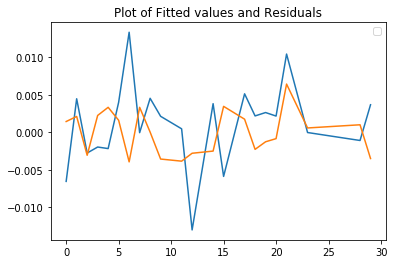

<h4>Multicollinearity Condition Number:&nbsp;2071. </h4>

<hr style='height:3px'/> <br /> <h2>33</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'RoE', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     4.081
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0149
Time:                        16:47:55   Log-Likelihood:                 97.818
No. Observations:                  22   AIC:                            -173.6
Df Residuals:                      11   BIC:                            -161.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1592      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.48% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

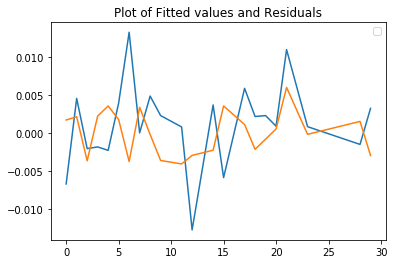

<h4>Multicollinearity Condition Number:&nbsp;9625. </h4>

<hr style='height:3px'/> <br /> <h2>34</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'GPM', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     5.146
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00806
Time:                        16:47:55   Log-Likelihood:                 95.942
No. Observations:                  21   AIC:                            -169.9
Df Residuals:                      10   BIC:                            -158.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1544      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.80% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

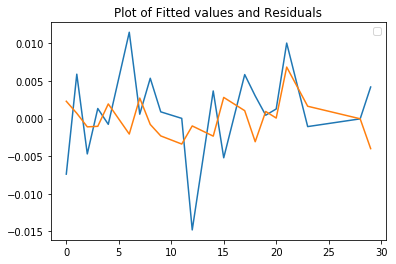

<h4>Multicollinearity Condition Number:&nbsp;2189. </h4>

<hr style='height:3px'/> <br /> <h2>35</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'GPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     4.249
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0159
Time:                        16:47:55   Log-Likelihood:                 94.286
No. Observations:                  21   AIC:                            -166.6
Df Residuals:                      10   BIC:                            -155.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1503      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.59% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

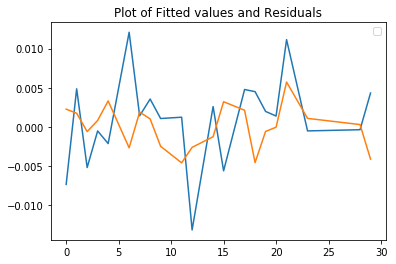

<h4>Multicollinearity Condition Number:&nbsp;2089. </h4>

<hr style='height:3px'/> <br /> <h2>36</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'GPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4.899
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00964
Time:                        16:47:55   Log-Likelihood:                 95.512
No. Observations:                  21   AIC:                            -169.0
Df Residuals:                      10   BIC:                            -157.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1402      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.96% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

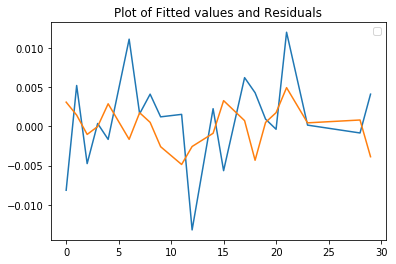

<h4>Multicollinearity Condition Number:&nbsp;11051 </h4>

<hr style='height:3px'/> <br /> <h2>37</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'NPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     4.536
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0100
Time:                        16:47:56   Log-Likelihood:                 98.743
No. Observations:                  22   AIC:                            -175.5
Df Residuals:                      11   BIC:                            -163.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1706      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.00% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

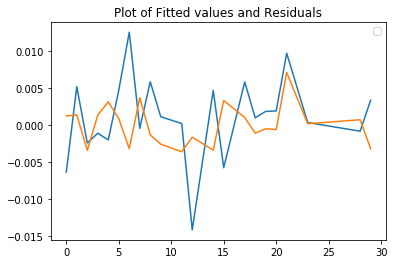

<h4>Multicollinearity Condition Number:&nbsp;1444. </h4>

<hr style='height:3px'/> <br /> <h2>38</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'NPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     4.476
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0105
Time:                        16:47:56   Log-Likelihood:                 98.627
No. Observations:                  22   AIC:                            -175.3
Df Residuals:                      11   BIC:                            -163.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1677      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.05% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

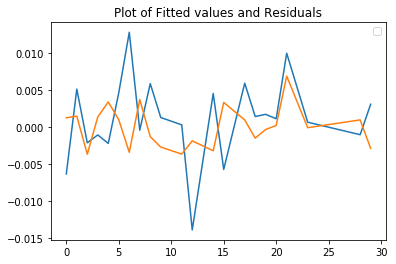

<h4>Multicollinearity Condition Number:&nbsp;9988. </h4>

<hr style='height:3px'/> <br /> <h2>39</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA', u'Current Ratio', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     4.470
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0106
Time:                        16:47:56   Log-Likelihood:                 98.614
No. Observations:                  22   AIC:                            -175.2
Df Residuals:                      11   BIC:                            -163.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1639      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.05% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

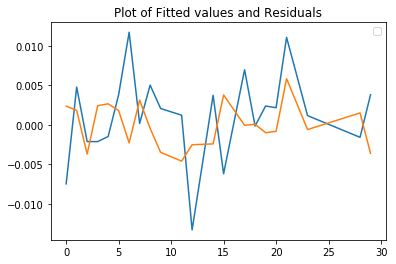

<h4>Multicollinearity Condition Number:&nbsp;9669. </h4>

<hr style='height:3px'/> <br /> <h2>40</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoE', u'GPM', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4.509
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0130
Time:                        16:47:56   Log-Likelihood:                 94.793
No. Observations:                  21   AIC:                            -167.6
Df Residuals:                      10   BIC:                            -156.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1633      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.29% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

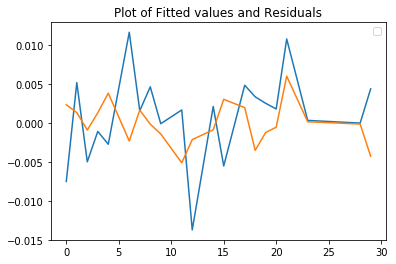

<h4>Multicollinearity Condition Number:&nbsp;2706. </h4>

<hr style='height:3px'/> <br /> <h2>41</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoE', u'GPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     4.284
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0155
Time:                        16:47:57   Log-Likelihood:                 94.356
No. Observations:                  21   AIC:                            -166.7
Df Residuals:                      10   BIC:                            -155.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1493      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.54% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

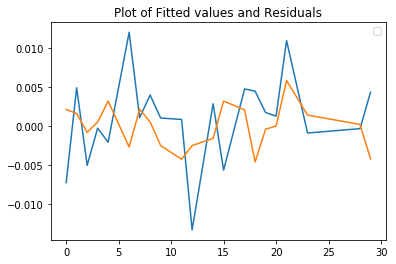

<h4>Multicollinearity Condition Number:&nbsp;2424. </h4>

<hr style='height:3px'/> <br /> <h2>42</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoE', u'GPM', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     4.904
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00960
Time:                        16:47:57   Log-Likelihood:                 95.522
No. Observations:                  21   AIC:                            -169.0
Df Residuals:                      10   BIC:                            -157.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1414      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.95% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

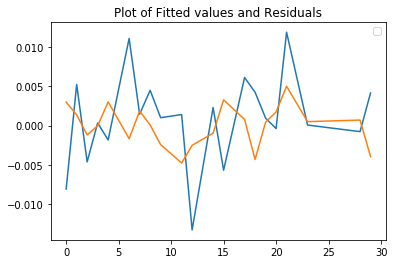

<h4>Multicollinearity Condition Number:&nbsp;10256 </h4>

<hr style='height:3px'/> <br /> <h2>43</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoE', u'NPM', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     4.201
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0134
Time:                        16:47:57   Log-Likelihood:                 98.069
No. Observations:                  22   AIC:                            -174.1
Df Residuals:                      11   BIC:                            -162.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1675      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.33% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

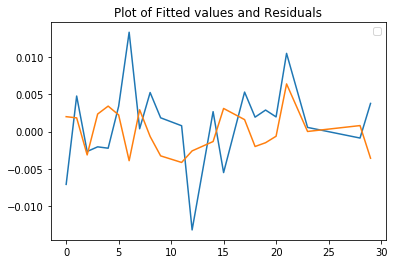

<h4>Multicollinearity Condition Number:&nbsp;2166. </h4>

<hr style='height:3px'/> <br /> <h2>44</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Debt to Equity']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     5.744
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00289
Time:                        16:47:57   Log-Likelihood:                 97.401
No. Observations:                  22   AIC:                            -176.8
Df Residuals:                      13   BIC:                            -167.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1628      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.28% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

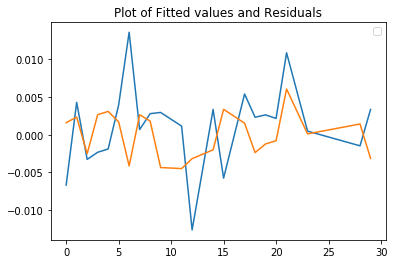

<h4>Multicollinearity Condition Number:&nbsp;6287. </h4>

<hr style='height:3px'/> <br /> <h2>45</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoA']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     5.819
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00273
Time:                        16:47:58   Log-Likelihood:                 97.513
No. Observations:                  22   AIC:                            -177.0
Df Residuals:                      13   BIC:                            -167.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1625      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.27% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

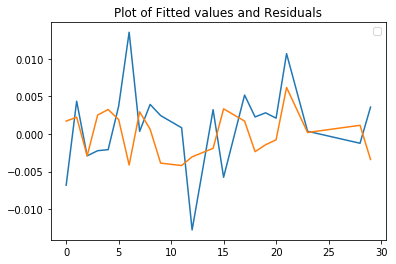

<h4>Multicollinearity Condition Number:&nbsp;979.0 </h4>

<hr style='height:3px'/> <br /> <h2>46</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     5.837
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00269
Time:                        16:47:58   Log-Likelihood:                 97.538
No. Observations:                  22   AIC:                            -177.1
Df Residuals:                      13   BIC:                            -167.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1606      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.26% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

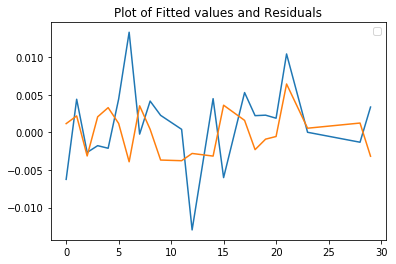

<h4>Multicollinearity Condition Number:&nbsp;1890. </h4>

<hr style='height:3px'/> <br /> <h2>47</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6.262
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00255
Time:                        16:47:58   Log-Likelihood:                 94.136
No. Observations:                  21   AIC:                            -170.3
Df Residuals:                      12   BIC:                            -160.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1527      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.25% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

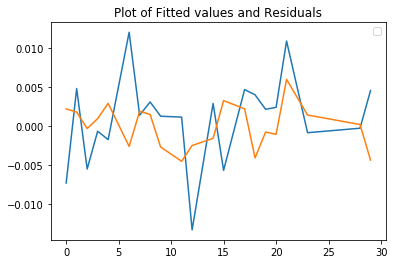

<h4>Multicollinearity Condition Number:&nbsp;1733. </h4>

<hr style='height:3px'/> <br /> <h2>48</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     6.182
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00207
Time:                        16:47:59   Log-Likelihood:                 98.036
No. Observations:                  22   AIC:                            -178.1
Df Residuals:                      13   BIC:                            -168.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1660      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.20% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

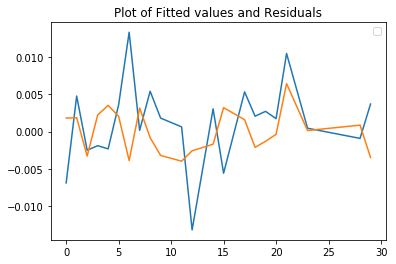

<h4>Multicollinearity Condition Number:&nbsp;1227. </h4>

<hr style='height:3px'/> <br /> <h2>49</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     5.704
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00299
Time:                        16:47:59   Log-Likelihood:                 97.340
No. Observations:                  22   AIC:                            -176.7
Df Residuals:                      13   BIC:                            -166.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1613      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.29% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

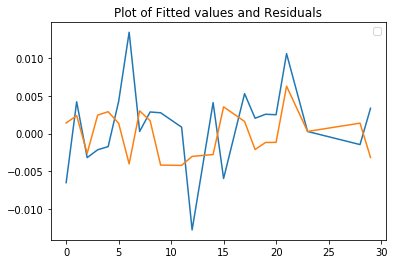

<h4>Multicollinearity Condition Number:&nbsp;778.9 </h4>

<hr style='height:3px'/> <br /> <h2>50</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Dividend Yield', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     5.825
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00272
Time:                        16:47:59   Log-Likelihood:                 97.520
No. Observations:                  22   AIC:                            -177.0
Df Residuals:                      13   BIC:                            -167.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1568      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.27% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

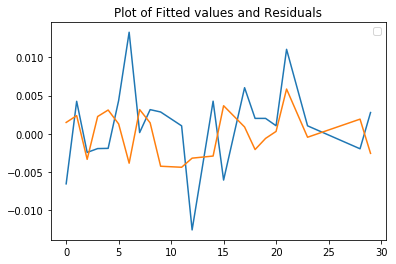

<h4>Multicollinearity Condition Number:&nbsp;9523. </h4>

<hr style='height:3px'/> <br /> <h2>51</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'RoA']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     3.361
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0206
Time:                        16:47:59   Log-Likelihood:                 101.16
No. Observations:                  24   AIC:                            -184.3
Df Residuals:                      15   BIC:                            -173.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1708      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 2.06% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

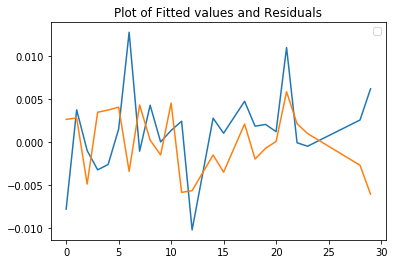

<h4>Multicollinearity Condition Number:&nbsp;6346. </h4>

<hr style='height:3px'/> <br /> <h2>52</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     5.439
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00242
Time:                        16:48:00   Log-Likelihood:                 105.17
No. Observations:                  24   AIC:                            -192.3
Df Residuals:                      15   BIC:                            -181.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1783      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.24% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

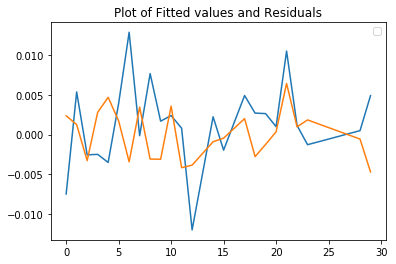

<h4>Multicollinearity Condition Number:&nbsp;6446. </h4>

<hr style='height:3px'/> <br /> <h2>53</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     3.166
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0286
Time:                        16:48:00   Log-Likelihood:                 96.779
No. Observations:                  23   AIC:                            -175.6
Df Residuals:                      14   BIC:                            -165.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1591      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 2.86% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

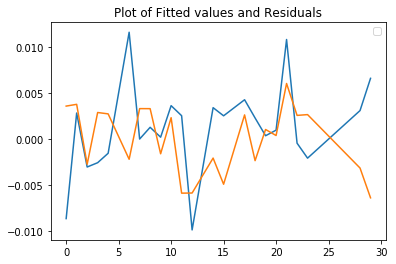

<h4>Multicollinearity Condition Number:&nbsp;7055. </h4>

<hr style='height:3px'/> <br /> <h2>54</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4.227
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00789
Time:                        16:48:00   Log-Likelihood:                 103.00
No. Observations:                  24   AIC:                            -188.0
Df Residuals:                      15   BIC:                            -177.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1782      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.78% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

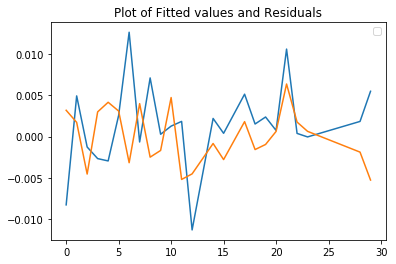

<h4>Multicollinearity Condition Number:&nbsp;6362. </h4>

<hr style='height:3px'/> <br /> <h2>55</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2.991
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0322
Time:                        16:48:00   Log-Likelihood:                 100.28
No. Observations:                  24   AIC:                            -182.6
Df Residuals:                      15   BIC:                            -172.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1684      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 3.21% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

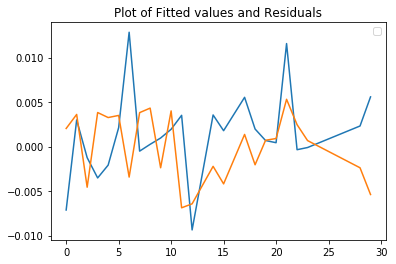

<h4>Multicollinearity Condition Number:&nbsp;6527. </h4>

<hr style='height:3px'/> <br /> <h2>56</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'Debt to Equity', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2.985
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0324
Time:                        16:48:01   Log-Likelihood:                 100.27
No. Observations:                  24   AIC:                            -182.5
Df Residuals:                      15   BIC:                            -171.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1696      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 3.24% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

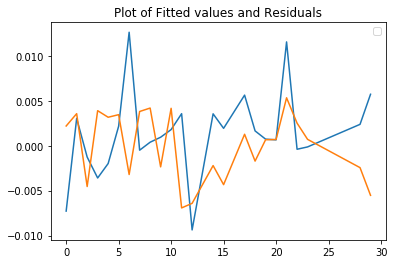

<h4>Multicollinearity Condition Number:&nbsp;10034 </h4>

<hr style='height:3px'/> <br /> <h2>57</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoA', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4.460
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00620
Time:                        16:48:01   Log-Likelihood:                 103.45
No. Observations:                  24   AIC:                            -188.9
Df Residuals:                      15   BIC:                            -178.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1658      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.62% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

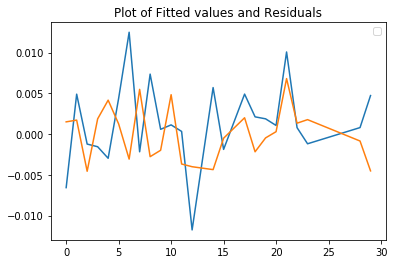

<h4>Multicollinearity Condition Number:&nbsp;2017. </h4>

<hr style='height:3px'/> <br /> <h2>58</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoA', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     3.524
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0191
Time:                        16:48:01   Log-Likelihood:                 97.588
No. Observations:                  23   AIC:                            -177.2
Df Residuals:                      14   BIC:                            -167.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1660      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.91% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

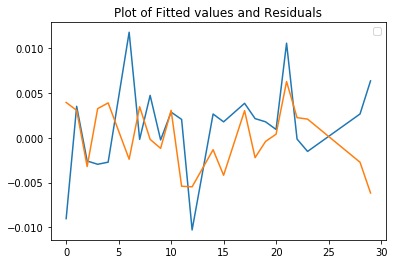

<h4>Multicollinearity Condition Number:&nbsp;1967. </h4>

<hr style='height:3px'/> <br /> <h2>59</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoA', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     4.595
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00541
Time:                        16:48:01   Log-Likelihood:                 103.70
No. Observations:                  24   AIC:                            -189.4
Df Residuals:                      15   BIC:                            -178.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1750      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.54% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

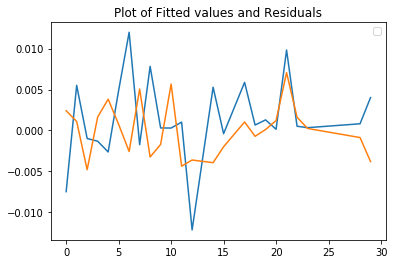

<h4>Multicollinearity Condition Number:&nbsp;1393. </h4>

<hr style='height:3px'/> <br /> <h2>60</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoA', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     3.413
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0194
Time:                        16:48:02   Log-Likelihood:                 101.28
No. Observations:                  24   AIC:                            -184.6
Df Residuals:                      15   BIC:                            -174.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1665      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.94% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

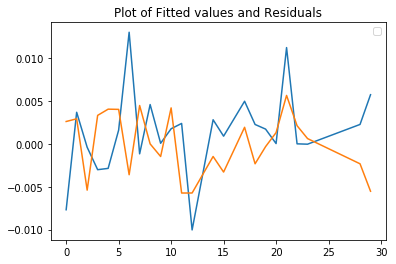

<h4>Multicollinearity Condition Number:&nbsp;1128. </h4>

<hr style='height:3px'/> <br /> <h2>61</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoA', u'Market Cap']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     3.379
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0202
Time:                        16:48:02   Log-Likelihood:                 101.20
No. Observations:                  24   AIC:                            -184.4
Df Residuals:                      15   BIC:                            -173.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1687      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 2.01% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

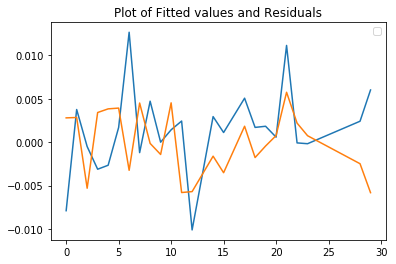

<h4>Multicollinearity Condition Number:&nbsp;9691. </h4>

<hr style='height:3px'/> <br /> <h2>62</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size', u'Momentum', u'RoE', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4.792
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00531
Time:                        16:48:02   Log-Likelihood:                 100.06
No. Observations:                  23   AIC:                            -182.1
Df Residuals:                      14   BIC:                            -171.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1580      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.53% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a nan% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

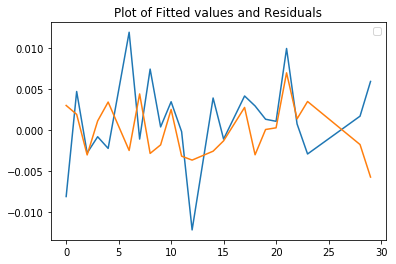

<h4>Multicollinearity Condition Number:&nbsp;2292. </h4>

<hr style='height:3px'/> <br /> <h2>63</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Firm Size']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.206
Method:                 Least Squares   F-statistic:                    0.2147
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.952
Time:                        16:48:03   Log-Likelihood:                 89.534
No. Observations:                  24   AIC:                            -167.1
Df Residuals:                      18   BIC:                            -160.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0050      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 95.1% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 95.9% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

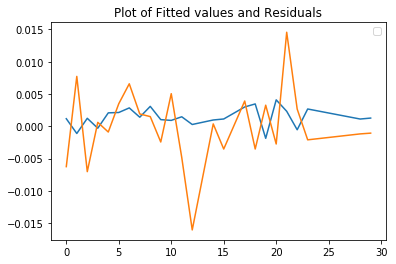

<h4>Multicollinearity Condition Number:&nbsp;84.12 </h4>

<hr style='height:3px'/> <br /> <h2>64</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Momentum']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     4.276
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00972
Time:                        16:48:03   Log-Likelihood:                 98.234
No. Observations:                  24   AIC:                            -184.5
Df Residuals:                      18   BIC:                            -177.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1597      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.97% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:green'>There is a 9.43% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

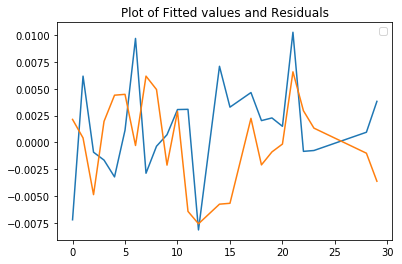

<h4>Multicollinearity Condition Number:&nbsp;978.7 </h4>

<hr style='height:3px'/> <br /> <h2>65</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Dividend Yield']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.052
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.422
Time:                        16:48:03   Log-Likelihood:                 83.897
No. Observations:                  22   AIC:                            -155.8
Df Residuals:                      16   BIC:                            -149.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 42.2% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 99.9% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

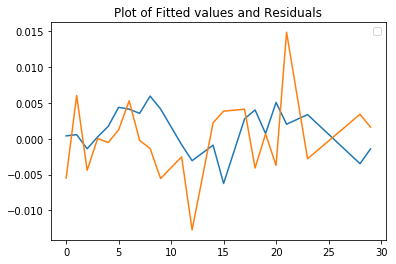

<h4>Multicollinearity Condition Number:&nbsp;54.86 </h4>

<hr style='height:3px'/> <br /> <h2>66</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Debt to Equity']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.221
Method:                 Least Squares   F-statistic:                    0.1662
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.972
Time:                        16:48:03   Log-Likelihood:                 89.381
No. Observations:                  24   AIC:                            -166.8
Df Residuals:                      18   BIC:                            -159.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0017      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 97.1% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 85.2% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

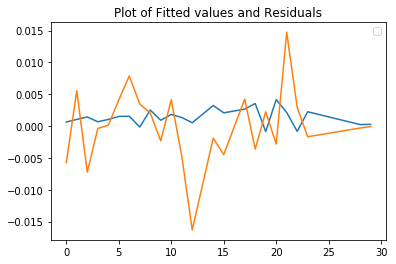

<h4>Multicollinearity Condition Number:&nbsp;286.0 </h4>

<hr style='height:3px'/> <br /> <h2>67</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'RoA']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.196
Method:                 Least Squares   F-statistic:                    0.2451
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.937
Time:                        16:48:04   Log-Likelihood:                 89.629
No. Observations:                  24   AIC:                            -167.3
Df Residuals:                      18   BIC:                            -160.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0007      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 93.6% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 97.7% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

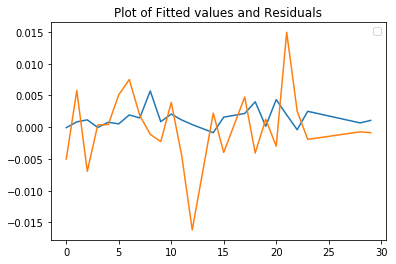

<h4>Multicollinearity Condition Number:&nbsp;54.69 </h4>

<hr style='height:3px'/> <br /> <h2>68</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.8096
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.558
Time:                        16:48:04   Log-Likelihood:                 91.274
No. Observations:                  24   AIC:                            -170.5
Df Residuals:                      18   BIC:                            -163.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0049      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 55.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 89.9% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

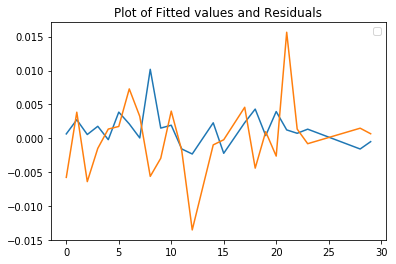

<h4>Multicollinearity Condition Number:&nbsp;143.0 </h4>

<hr style='height:3px'/> <br /> <h2>69</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.7380
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.605
Time:                        16:48:04   Log-Likelihood:                 87.159
No. Observations:                  23   AIC:                            -162.3
Df Residuals:                      17   BIC:                            -155.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0007      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 60.5% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 92.0% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

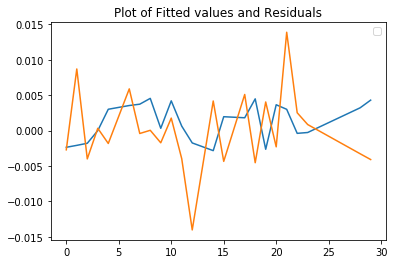

<h4>Multicollinearity Condition Number:&nbsp;94.81 </h4>

<hr style='height:3px'/> <br /> <h2>70</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'NPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.151
Method:                 Least Squares   F-statistic:                    0.3972
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.844
Time:                        16:48:05   Log-Likelihood:                 90.095
No. Observations:                  24   AIC:                            -168.2
Df Residuals:                      18   BIC:                            -161.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0015      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 84.4% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 76.8% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

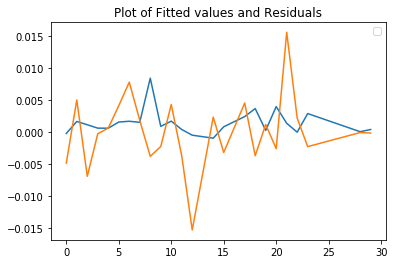

<h4>Multicollinearity Condition Number:&nbsp;81.70 </h4>

<hr style='height:3px'/> <br /> <h2>71</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales', u'Price to Cash Flow', u'Current Ratio']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.169
Method:                 Least Squares   F-statistic:                    0.3355
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.885
Time:                        16:48:05   Log-Likelihood:                 89.908
No. Observations:                  24   AIC:                            -167.8
Df Residuals:                      18   BIC:                            -160.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0046      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 88.4% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 54.4% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

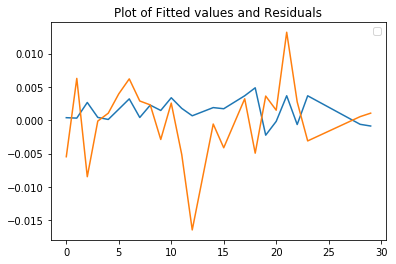

<h4>Multicollinearity Condition Number:&nbsp;57.06 </h4>

<hr style='height:3px'/> <br /> <h2>72</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Sales']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                    0.1511
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.928
Time:                        16:48:05   Log-Likelihood:                 89.108
No. Observations:                  24   AIC:                            -170.2
Df Residuals:                      20   BIC:                            -165.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0015      0.003  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 92.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 70.5% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

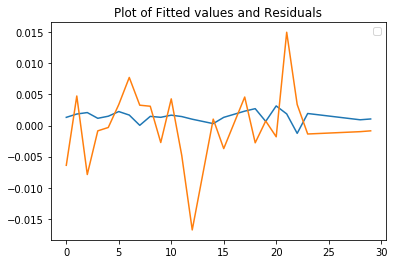

<h4>Multicollinearity Condition Number:&nbsp;34.93 </h4>

<hr style='height:3px'/> <br /> <h2>73</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Price to Cash Flow']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.138
Method:                 Least Squares   F-statistic:                   0.07266
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.974
Time:                        16:48:05   Log-Likelihood:                 88.969
No. Observations:                  24   AIC:                            -169.9
Df Residuals:                      20   BIC:                            -165.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0025      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 97.3% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 94.5% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

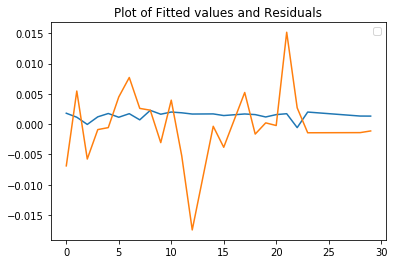

<h4>Multicollinearity Condition Number:&nbsp;39.93 </h4>

<hr style='height:3px'/> <br /> <h2>74</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Firm Size']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                   0.06549
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.978
Time:                        16:48:06   Log-Likelihood:                 88.957
No. Observations:                  24   AIC:                            -169.9
Df Residuals:                      20   BIC:                            -165.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0024      0.004  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 97.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 73.5% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

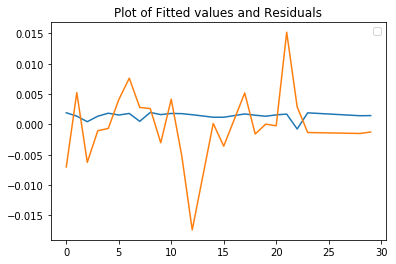

<h4>Multicollinearity Condition Number:&nbsp;59.34 </h4>

<hr style='height:3px'/> <br /> <h2>75</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Momentum']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     7.683
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00132
Time:                        16:48:06   Log-Likelihood:                 98.039
No. Observations:                  24   AIC:                            -188.1
Df Residuals:                      20   BIC:                            -183.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1605      0.034  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.13% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:green'>There is a 20.7% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

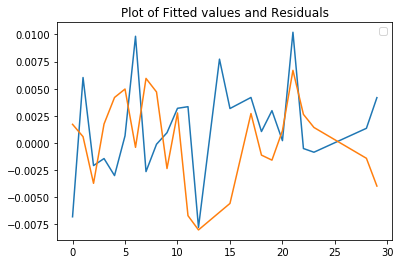

<h4>Multicollinearity Condition Number:&nbsp;870.2 </h4>

<hr style='height:3px'/> <br /> <h2>76</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Dividend Yield']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9937
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.418
Time:                        16:48:06   Log-Likelihood:                 82.457
No. Observations:                  22   AIC:                            -156.9
Df Residuals:                      18   BIC:                            -152.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0021      0.005  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 41.8% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 94.0% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

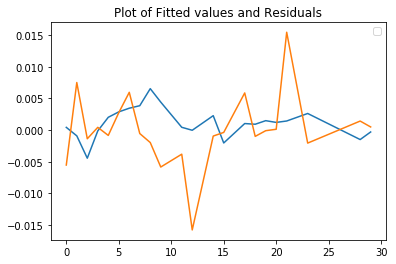

<h4>Multicollinearity Condition Number:&nbsp;46.34 </h4>

<hr style='height:3px'/> <br /> <h2>77</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'Debt to Equity']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.133
Method:                 Least Squares   F-statistic:                   0.09932
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.959
Time:                        16:48:07   Log-Likelihood:                 89.017
No. Observations:                  24   AIC:                            -170.0
Df Residuals:                      20   BIC:                            -165.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0021      0.002  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 95.9% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 94.8% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

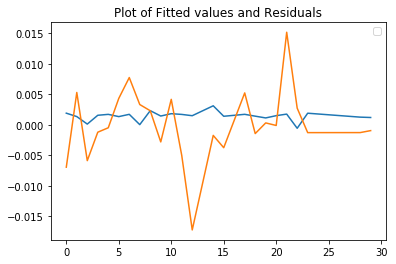

<h4>Multicollinearity Condition Number:&nbsp;202.3 </h4>

<hr style='height:3px'/> <br /> <h2>78</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'RoA']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.3317
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.803
Time:                        16:48:07   Log-Likelihood:                 89.422
No. Observations:                  24   AIC:                            -170.8
Df Residuals:                      20   BIC:                            -166.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002      0.003  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 80.2% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 97.7% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

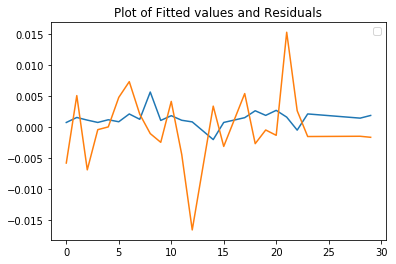

<h4>Multicollinearity Condition Number:&nbsp;44.88 </h4>

<hr style='height:3px'/> <br /> <h2>79</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'RoE']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.5178
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.675
Time:                        16:48:07   Log-Likelihood:                 89.737
No. Observations:                  24   AIC:                            -171.5
Df Residuals:                      20   BIC:                            -166.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0008      0.003  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 67.4% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 95.4% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

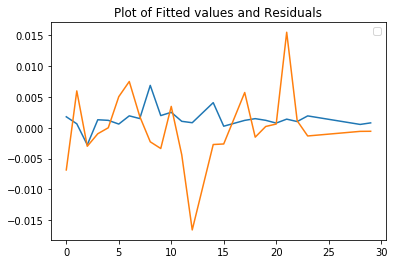

<h4>Multicollinearity Condition Number:&nbsp;69.59 </h4>

<hr style='height:3px'/> <br /> <h2>80</h3>

<br /> <h3>[u'Price to Book', u'Price to Earning', u'GPM']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.5607
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.647
Time:                        16:48:08   Log-Likelihood:                 85.876
No. Observations:                  23   AIC:                            -163.8
Df Residuals:                      19   BIC:                            -159.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0005      0.003  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 64.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 63.1% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

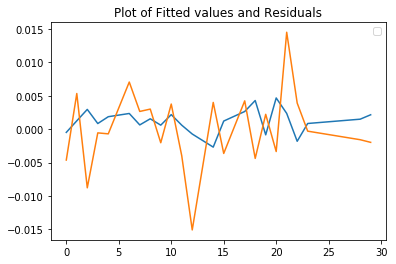

<h4>Multicollinearity Condition Number:&nbsp;76.10 </h4>

<hr style='height:3px'/> <br /> <h2>81</h3>

<br /> <h3>[u'Price to Book']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.06028
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.808
Time:                        16:48:08   Log-Likelihood:                 94.627
No. Observations:                  26   AIC:                            -185.3
Df Residuals:                      24   BIC:                            -182.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.002      1.262

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 80.8% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 62.8% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

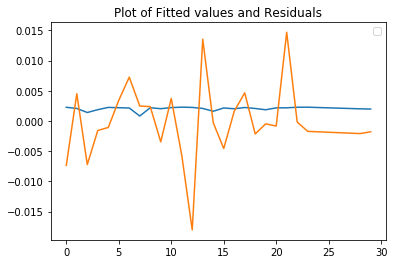

<h4>Multicollinearity Condition Number:&nbsp;4.386 </h4>

<hr style='height:3px'/> <br /> <h2>82</h3>

<br /> <h3>[u'Price to Earning']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1604
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.692
Time:                        16:48:08   Log-Likelihood:                 93.121
No. Observations:                  25   AIC:                            -182.2
Df Residuals:                      23   BIC:                            -179.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0019      0.002  

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 69.2% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 86.4% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

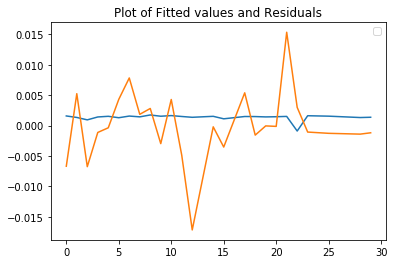

<h4>Multicollinearity Condition Number:&nbsp;22.76 </h4>

<hr style='height:3px'/> <br /> <h2>83</h3>

<br /> <h3>[u'Price to Sales']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     6.410
Date:                Tue, 14 Aug 2018   Prob (F-statistic):             0.0175
Time:                        16:48:08   Log-Likelihood:                 110.05
No. Observations:                  29   AIC:                            -216.1
Df Residuals:                      27   BIC:                            -213.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.001      0.

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 1.74% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 89.3% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

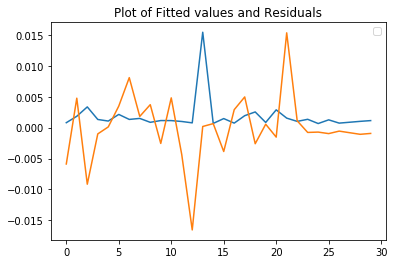

<h4>Multicollinearity Condition Number:&nbsp;4.824 </h4>

<hr style='height:3px'/> <br /> <h2>84</h3>

<br /> <h3>[u'Price to Cash Flow']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.2706
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.608
Time:                        16:48:09   Log-Likelihood:                 97.381
No. Observations:                  26   AIC:                            -190.8
Df Residuals:                      24   BIC:                            -188.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 60.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 85.8% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

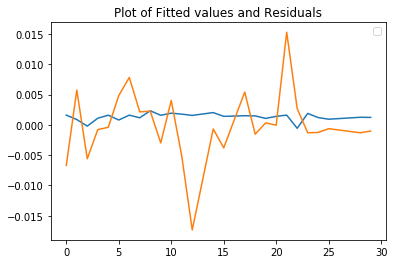

<h4>Multicollinearity Condition Number:&nbsp;17.93 </h4>

<hr style='height:3px'/> <br /> <h2>85</h3>

<br /> <h3>[u'Firm Size']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                  0.001671
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.968
Time:                        16:48:09   Log-Likelihood:                 106.96
No. Observations:                  29   AIC:                            -209.9
Df Residuals:                      27   BIC:                            -207.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.003      0.505      0.6

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 96.7% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:green'>There is a 21.3% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

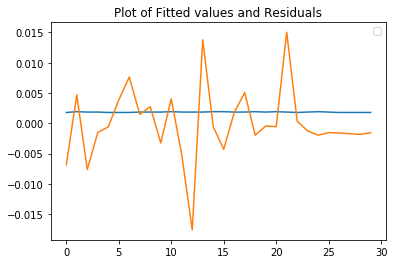

<h4>Multicollinearity Condition Number:&nbsp;7.352 </h4>

<hr style='height:3px'/> <br /> <h2>86</h3>

<br /> <h3>[u'Momentum']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     20.37
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           0.000112
Time:                        16:48:09   Log-Likelihood:                 115.11
No. Observations:                  29   AIC:                            -226.2
Df Residuals:                      27   BIC:                            -223.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1579      0.035     -4.460      0.0

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 0.01% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 64.7% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

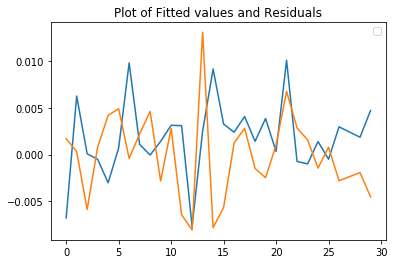

<h4>Multicollinearity Condition Number:&nbsp;80.49 </h4>

<hr style='height:3px'/> <br /> <h2>87</h3>

<br /> <h3>[u'Dividend Yield']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.184
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.154
Time:                        16:48:09   Log-Likelihood:                 90.264
No. Observations:                  24   AIC:                            -176.5
Df Residuals:                      22   BIC:                            -174.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0024      0.003     -0.

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 15.3% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 64.8% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

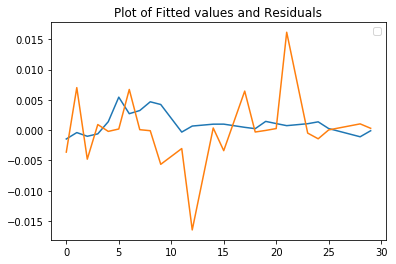

<h4>Multicollinearity Condition Number:&nbsp;15.55 </h4>

<hr style='height:3px'/> <br /> <h2>88</h3>

<br /> <h3>[u'Debt to Equity']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.3676
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.550
Time:                        16:48:10   Log-Likelihood:                 94.792
No. Observations:                  26   AIC:                            -185.6
Df Residuals:                      24   BIC:                            -183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0016      0.001      1.

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:red'>There is a 55.0% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 90.5% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

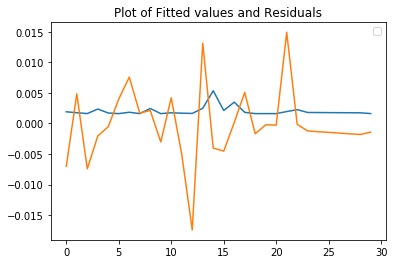

<h4>Multicollinearity Condition Number:&nbsp;138.0 </h4>

<hr style='height:3px'/> <br /> <h2>89</h3>

<br /> <h3>[u'RoA']</h3>

                            OLS Regression Results                            
Dep. Variable:        Average Returns   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.4950
Date:                Tue, 14 Aug 2018   Prob (F-statistic):              0.488
Time:                        16:48:10   Log-Likelihood:                 98.963
No. Observations:                  27   AIC:                            -193.9
Df Residuals:                      25   BIC:                            -191.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.002      1.708      0.1

<br /> <h4 style='color:red'>R squared is below the threshold of 0.7. Most of the variation in the dependant variable is not explained by the independant variables.</h4>

<br /> <h4 style='color:green'>There is a 48.8% chance that the independant variables are 0 in the population.</h4>

<br /> <h4 style='color:red'>There is a 65.5% chance that the data is not homoskedatistic.</h4>

<br /> <h4 style='color:red'>Not all of the T-stats of independant variables are above 2</h4>

<br /> <h4 style='color:green'>Durbin Watson stat is within the 1 to 3 range. There is weak evidence of serial correlation.</h4>

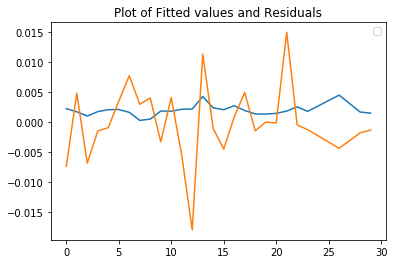

<h4>Multicollinearity Condition Number:&nbsp;16.42 </h4>

In [323]:
d = [15, 13, 10, 8, 5, 3, 1]
c = [1, 19, 30, 20, 10, 10, 10]
count = 1

for x, y in zip(d, c):
    comb = combinations(df.columns[2:], x)
    
    z = 1
    for c in comb:
        display(Markdown("<hr style='height:3px'/> <br /> <h2>" + str(count) + "</h3>"))
        count = count+1
        makeModel(list(c))
        z = z+1
        if z==y:
            break

Model number 64 is one of the best models made. It passed 5 out of 7 tests I conducted. It failed the R-sq test at the threshold of 0.7 but the R sq is greater than 0.5, so 50pc of the variation is explained by the dependant variables. However the t-stat test as very poor results. The skew is close to zero and there is no excess kurtosis.

Model number 75 has also failed the R squared test but is also above 50pc. The t stats aren't good either but there is a fewer number of variables.

Model 75 is the best model.